In [20]:
#!pip install pyspark
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install tqdm
#!pip install random
#!pip install keras_preprocessing
#!pip install tensorflow
#!pip install functools

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras_preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [22]:
input_path = []
label = []

for class_name in os.listdir("C:/Users/shiri/Downloads/PROJECT"):
    for path in os.listdir("C:/Users/shiri/Downloads/PROJECT/"+class_name):
        if class_name == 'bio':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("C:/Users/shiri/Downloads/PROJECT", class_name, path))
print(input_path[0], label[0])

C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.2_BIODEG_ORI_29307.jpg 0


In [23]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df

images  label
0      C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.3_B...      0
1      C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.3_B...      0
2      C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
3      C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
4      C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
...                                                  ...    ...
62356  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
62357  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
62358  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
62359  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...      1
62360  C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.3_B...      0

[62361 rows x 2 columns]

In [24]:
df.to_csv("df.csv")

In [25]:
#Spark SQL save(simple query to showimages)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Practice').getOrCreate()

df_spark = spark.read.option('header', 'true').csv('df.csv')#Spark SQL save(simple query to showimages)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Practice').getOrCreate()

df_spark = spark.read.option('header', 'true').csv('df.csv')

In [26]:
df_label_1 = df_spark.filter("label == 1")
df_label_0 = df_spark.filter("label == 0")
df_label_1.show(), df_label_0.show()


+---+--------------------+-----+
|_c0|              images|label|
+---+--------------------+-----+
|  2|C:/Users/shiri/Do...|    1|
|  3|C:/Users/shiri/Do...|    1|
|  4|C:/Users/shiri/Do...|    1|
|  5|C:/Users/shiri/Do...|    1|
|  7|C:/Users/shiri/Do...|    1|
|  8|C:/Users/shiri/Do...|    1|
| 11|C:/Users/shiri/Do...|    1|
| 12|C:/Users/shiri/Do...|    1|
| 13|C:/Users/shiri/Do...|    1|
| 16|C:/Users/shiri/Do...|    1|
| 17|C:/Users/shiri/Do...|    1|
| 20|C:/Users/shiri/Do...|    1|
| 21|C:/Users/shiri/Do...|    1|
| 27|C:/Users/shiri/Do...|    1|
| 28|C:/Users/shiri/Do...|    1|
| 31|C:/Users/shiri/Do...|    1|
| 32|C:/Users/shiri/Do...|    1|
| 36|C:/Users/shiri/Do...|    1|
| 37|C:/Users/shiri/Do...|    1|
| 38|C:/Users/shiri/Do...|    1|
+---+--------------------+-----+
only showing top 20 rows

+---+--------------------+-----+
|_c0|              images|label|
+---+--------------------+-----+
|  0|C:/Users/shiri/Do...|    0|
|  1|C:/Users/shiri/Do...|    0|
|  6|C:/Users/shi

(None, None)

In [27]:
from pyspark.sql.functions import lit, when

df_new = df_spark.withColumn("Type", when(df_spark.label == "1", lit("Non-Biodegredable")).otherwise(lit("Biodegreadable")))


In [28]:
df_new.show()

+---+--------------------+-----+-----------------+
|_c0|              images|label|             Type|
+---+--------------------+-----+-----------------+
|  0|C:/Users/shiri/Do...|    0|   Biodegreadable|
|  1|C:/Users/shiri/Do...|    0|   Biodegreadable|
|  2|C:/Users/shiri/Do...|    1|Non-Biodegredable|
|  3|C:/Users/shiri/Do...|    1|Non-Biodegredable|
|  4|C:/Users/shiri/Do...|    1|Non-Biodegredable|
|  5|C:/Users/shiri/Do...|    1|Non-Biodegredable|
|  6|C:/Users/shiri/Do...|    0|   Biodegreadable|
|  7|C:/Users/shiri/Do...|    1|Non-Biodegredable|
|  8|C:/Users/shiri/Do...|    1|Non-Biodegredable|
|  9|C:/Users/shiri/Do...|    0|   Biodegreadable|
| 10|C:/Users/shiri/Do...|    0|   Biodegreadable|
| 11|C:/Users/shiri/Do...|    1|Non-Biodegredable|
| 12|C:/Users/shiri/Do...|    1|Non-Biodegredable|
| 13|C:/Users/shiri/Do...|    1|Non-Biodegredable|
| 14|C:/Users/shiri/Do...|    0|   Biodegreadable|
| 15|C:/Users/shiri/Do...|    0|   Biodegreadable|
| 16|C:/Users/shiri/Do...|    1

In [29]:
df_group = df_new.groupby('Type').count()
df_group.show()

+-----------------+-----+
|             Type|count|
+-----------------+-----+
|Non-Biodegredable|31762|
|   Biodegreadable|30599|
+-----------------+-----+



In [30]:
input_path1 = []
label1 = []

for class_name in os.listdir("C:/Users/shiri/Downloads/TEST"):
    for path in os.listdir("C:/Users/shiri/Downloads/TEST/"+class_name):
        if class_name == 'bio':
            label1.append(0)
        else:
            label1.append(1)
        input_path1.append(os.path.join("C:/Users/shiri/Downloads/TEST", class_name, path))
print(input_path1[0], label1[0])

C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_HFL_1066.jpg 0


In [31]:
test = pd.DataFrame()
test['images'] = input_path1
test['label'] = label1
test = test.sample(frac=1).reset_index(drop=True)
test['label'] = test['label'].replace({ 0: 'BIO', 1: 'NBIO' })
test

images label
0    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
1    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
2    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
3    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
4    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
..                                                 ...   ...
395  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO
396  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO
397  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO
398  C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
399  C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO

[400 rows x 2 columns]

In [32]:
######
for i in df['images']:
    if '.jpg' not in i:
        print(i)

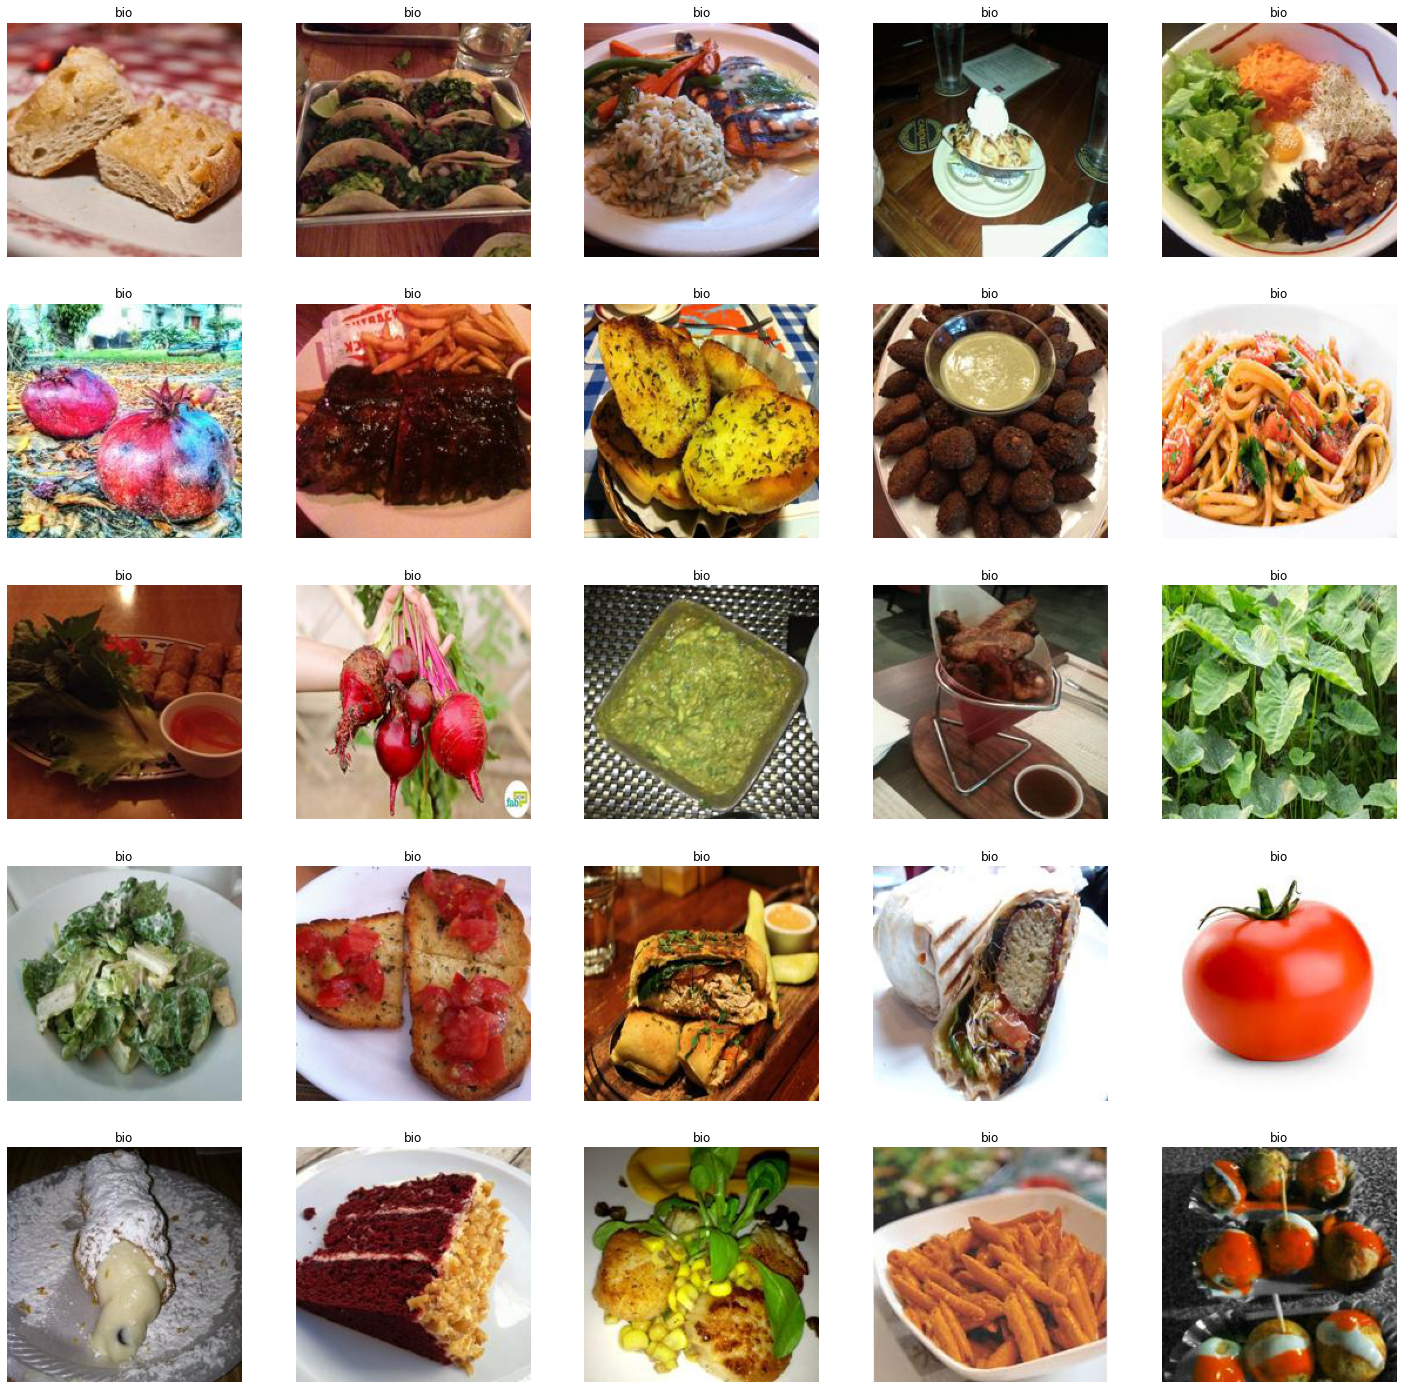

In [33]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('bio')
    plt.axis('off')

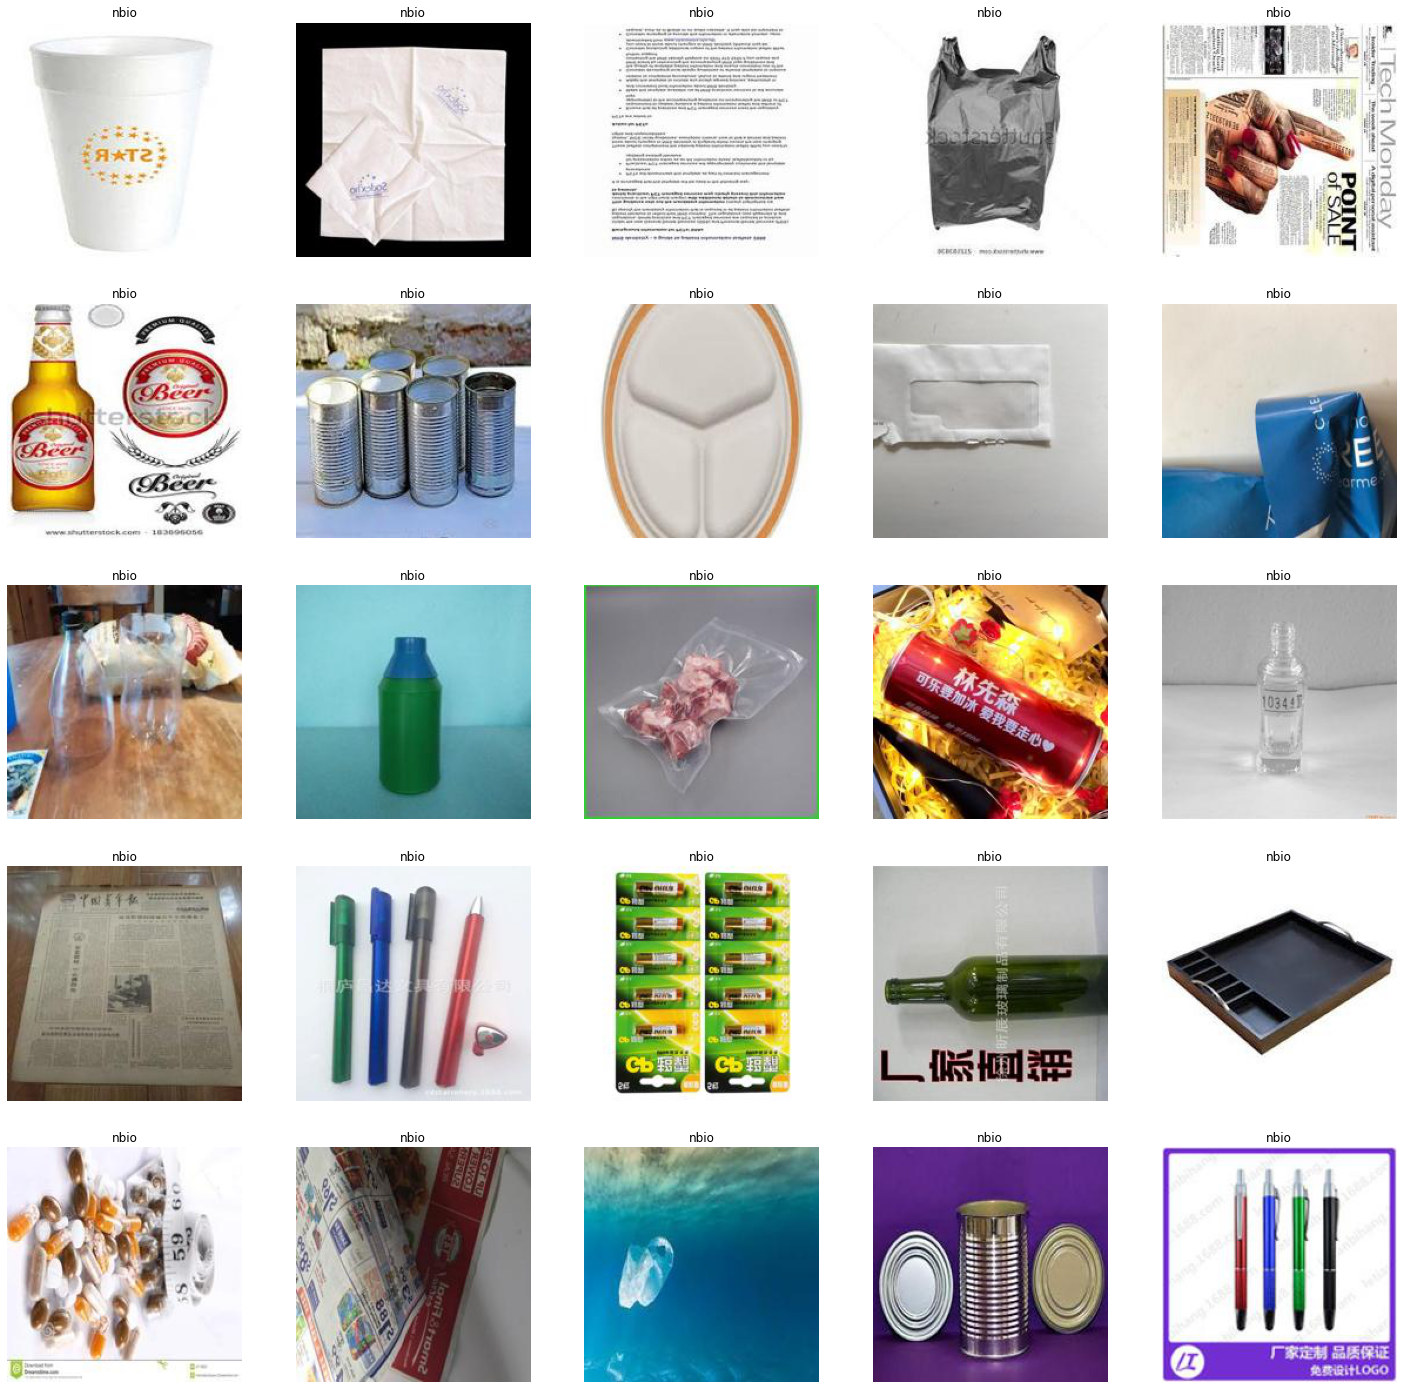

In [34]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('nbio')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

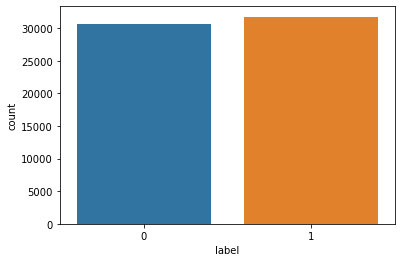

In [35]:
import seaborn as sns
sns.countplot(df['label'])

In [36]:
df['label'] = df['label'].astype('str')
df

images label
0      C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.3_B...     0
1      C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.3_B...     0
2      C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
3      C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
4      C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
...                                                  ...   ...
62356  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
62357  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
62358  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
62359  C:/Users/shiri/Downloads/PROJECT\nbio\TRAIN.2_...     1
62360  C:/Users/shiri/Downloads/PROJECT\bio\TRAIN.3_B...     0

[62361 rows x 2 columns]

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns


'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [39]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2,random_state=seed)

In [40]:
train_set.shape, valid_set.shape

((49888, 2), (12473, 2))

train set distribution:
 1    25480
0    24408
Name: label, dtype: int64

valid set distribution:
 1    6282
0    6191
Name: label, dtype: int64



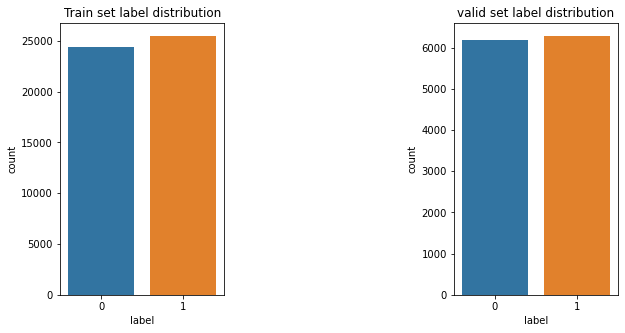

In [41]:
print('train set distribution:\n',train_set['label'].value_counts())
print('\nvalid set distribution:\n',valid_set['label'].value_counts())
print()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_set['label'], order=['0','1'])
plt.title('Train set label distribution')

plt.subplot(1,3,3)
sns.countplot(x=valid_set['label'], order=['0','1'])
plt.title('valid set label distribution')
plt.show()

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH, HEIGHT = 64, 64
batch_size = 32

In [43]:
train_datagenerator = ImageDataGenerator(rotation_range=15, 
                                  rescale=1./255, 
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

training_data = train_datagenerator.flow_from_dataframe(dataframe=train_set, 
                                                        
                                                       x_col='images',
                                                       y_col='label',
                                                       target_size=(WIDTH, HEIGHT),
                                                       class_mode='categorical',
                                                       batch_size=batch_size)

Found 49888 validated image filenames belonging to 2 classes.


In [44]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_data = valid_datagenerator.flow_from_dataframe(dataframe=valid_set,
                                                        
                                                         x_col='images',
                                                         y_col='label',
                                                         target_size=(WIDTH,HEIGHT),
                                                         class_mode='categorical',
                                                         batch_size=batch_size)

Found 12473 validated image filenames belonging to 2 classes.


In [45]:
from tensorflow.keras.layers import *
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32, kernel_size=5, input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       7

In [47]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [48]:
history = model.fit(training_data,
                   epochs=10,
                   validation_data=validation_data,
                   validation_steps=valid_set.shape[0]//batch_size,
                   steps_per_epoch=train_set.shape[0]//batch_size
                   )

Epoch 1/10
1559/1559 [==============================] - 277s 177ms/step - loss: 0.3798 - accuracy: 0.8400 - val_loss: 0.2732 - val_accuracy: 0.8805
Epoch 2/10
1559/1559 [==============================] - 238s 153ms/step - loss: 0.2857 - accuracy: 0.8848 - val_loss: 0.2708 - val_accuracy: 0.8871
Epoch 3/10
1559/1559 [==============================] - 244s 156ms/step - loss: 0.2548 - accuracy: 0.8973 - val_loss: 0.2125 - val_accuracy: 0.9169
Epoch 4/10
1559/1559 [==============================] - 236s 151ms/step - loss: 0.2372 - accuracy: 0.9059 - val_loss: 0.2138 - val_accuracy: 0.9112
Epoch 5/10
1559/1559 [==============================] - 240s 154ms/step - loss: 0.2251 - accuracy: 0.9113 - val_loss: 0.1962 - val_accuracy: 0.9255
Epoch 6/10
1559/1559 [==============================] - 238s 153ms/step - loss: 0.2144 - accuracy: 0.9154 - val_loss: 0.1730 - val_accuracy: 0.9331
Epoch 7/10
1559/1559 [==============================] - 236s 151ms/step - loss: 0.2056 - accuracy: 0.9193 - val_

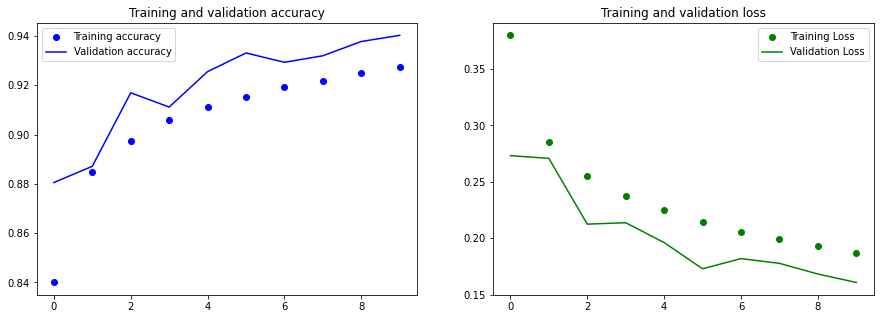

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
test_loss, test_acc = model.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

390/390 [==============================] - 17s 44ms/step - loss: 0.1611 - accuracy: 0.9402
Loss: 0.161
Accuracy: 94.019


In [51]:
base_model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(WIDTH,HEIGHT,3))
base_model.trainable = False ## Not trainable weights

In [52]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [53]:
from tensorflow.keras.layers import *

model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data,
            epochs=2,
            validation_data=validation_data,
            validation_steps=valid_set.shape[0]//batch_size,
            steps_per_epoch=train_set.shape[0]//batch_size, 
            )

Epoch 1/2
1559/1559 [==============================] - 381s 243ms/step - loss: 0.2858 - accuracy: 0.8830 - val_loss: 0.2464 - val_accuracy: 0.9017
Epoch 2/2
1559/1559 [==============================] - 379s 243ms/step - loss: 0.2576 - accuracy: 0.8953 - val_loss: 0.2523 - val_accuracy: 0.8911


In [54]:
model.layers[0].trainable=True

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model1.h5',save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data,
            epochs=2,
            validation_data=validation_data,
            validation_steps=valid_set.shape[0]//batch_size,
            steps_per_epoch=train_set.shape[0]//batch_size)

Epoch 1/2
1559/1559 [==============================] - 1701s 1s/step - loss: 0.1668 - accuracy: 0.9373 - val_loss: 0.1098 - val_accuracy: 0.9593
Epoch 2/2
1559/1559 [==============================] - 1681s 1s/step - loss: 0.1217 - accuracy: 0.9549 - val_loss: 0.1033 - val_accuracy: 0.9621


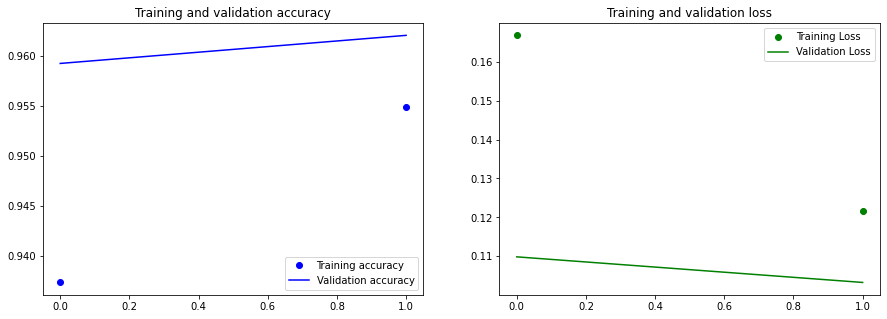

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [57]:
test_loss, test_acc = model.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

390/390 [==============================] - 70s 180ms/step - loss: 0.1032 - accuracy: 0.9621
Loss: 0.103
Accuracy: 96.208


In [58]:
test

images label
0    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
1    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
2    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
3    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
4    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
..                                                 ...   ...
395  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO
396  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO
397  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO
398  C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO
399  C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO

[400 rows x 2 columns]

In [59]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test, 
                                                
                                                x_col='images',
                                                y_col=None,
                                                class_mode=None,
                                                target_size=(WIDTH,HEIGHT),
                                                batch_size=batch_size,
                                                shuffle=False)

Found 400 validated image filenames.


In [60]:
predict = model.predict(test_generator, steps=np.ceil(test.shape[0]/batch_size))

13/13 [==============================] - 3s 177ms/step


In [61]:
test['label_pred'] = np.argmax(predict, axis=-1)
test['label_pred'] = test['label_pred'].replace({ 0: 'BIO', 1: 'NBIO' })

In [62]:
test

images label label_pred
0    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO       NBIO
1    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO       NBIO
2    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO       NBIO
3    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO       NBIO
4    C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO       NBIO
..                                                 ...   ...        ...
395  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO        BIO
396  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO        BIO
397  C:/Users/shiri/Downloads/TEST\bio\TEST_BIODEG_...   BIO        BIO
398  C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO       NBIO
399  C:/Users/shiri/Downloads/TEST\nbio\TEST_NBIODE...  NBIO        BIO

[400 rows x 3 columns]

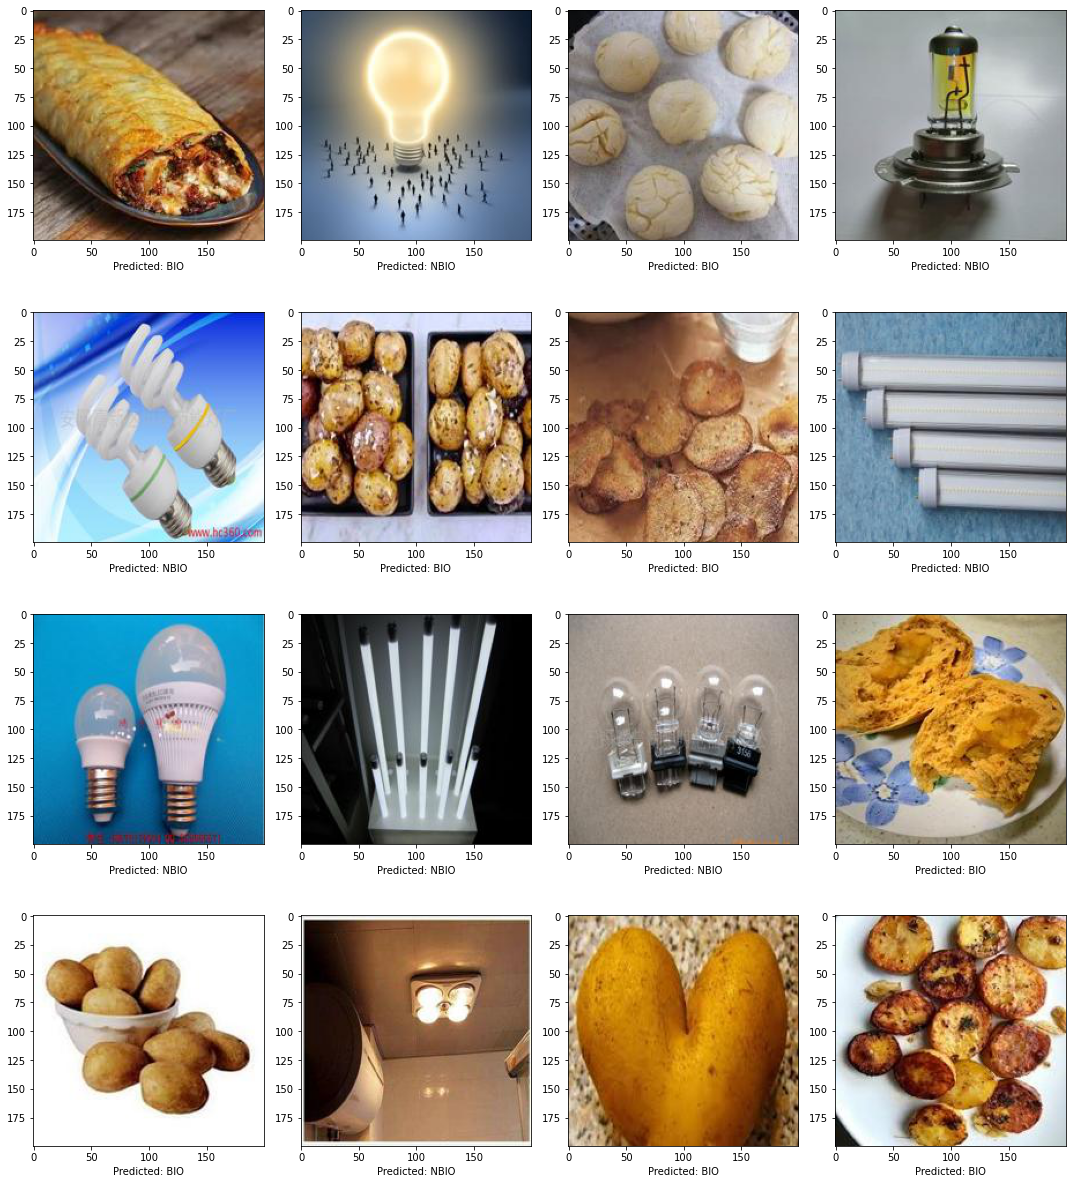

In [63]:
sample_test = test.values[np.random.randint(0, len(test), 16)]
sample_test
plt.figure(figsize=(15, 17))
for index, row in enumerate(sample_test):
    filename = row[0]
    category = row[1]
    image = img.imread(filename)
    plt.subplot(4, 4, index+1)
    plt.imshow(image)
    plt.xlabel('Predicted: ' + "{}".format(category) )
plt.tight_layout()
plt.show()

In [64]:
#Model Evaluation 
test_true = []

for i in range(4):
    a, b = next(iter(validation_data))
    test_true.extend(np.argmax(b, axis = 1))

test_true = np.array(test_true)
test_true.shape


(128,)

In [67]:
test_pred = model.predict(validation_data)
test_pred = np.argmax(test_pred, axis = 1)
test_pred = test_pred[0:128]
test_pred.shape

390/390 [==============================] - 70s 179ms/step


(128,)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

accuracy = accuracy_score(test_true, test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5078125


<AxesSubplot:title={'center':'Confusion matrix'}>

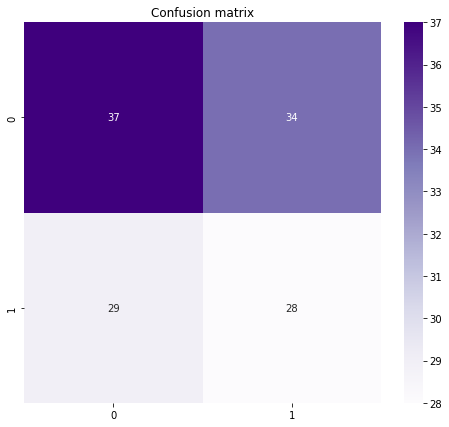

In [69]:
#Confusion Matrix
import seaborn as sea

cf = confusion_matrix(test_true, test_pred)
tn, fp, fn, tp = cf.ravel()

plt.figure(figsize = (8,7))
plt.title("Confusion matrix")
sea.heatmap(cf, annot=True, cmap = 'Purples')

In [70]:
print("True Negative:", tn)
print("Fale Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 37
Fale Positive: 34
False Negative: 29
True Positive: 28


In [71]:
#Precison recall and f1 square
precision, recall, f1, _ = precision_recall_fscore_support(test_true, test_pred, average = 'weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.5120700452101661
Recall: 0.5078125
F1 score: 0.509171049806784
